In [2]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error


%matplotlib inline


In [3]:
# Loading the data
df = pd.read_csv(r"C:\Users\Lokanathswami\Desktop\Marketing Raw Data.csv")
df.head()

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500,No Promo


In [4]:
df.shape

(185, 11)

In [5]:
#EDA
#Checking Null Values
df.isnull().sum()

Date               0
Week               3
Week_ID            3
Month              3
Month_ID           3
Year               3
Day_Name           3
Visitors           3
Revenue            3
Marketing Spend    3
Promo              3
dtype: int64

In [6]:
#Visualize The Null values
df[df['Week'].isnull()]

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,12/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Dropping NaN Values
#df.dropna() # Drops all NaN values from each columnwise.If one NaN entry in column it drops that entire row
df.dropna(subset=['Week']) #drops only in Week column
df=df.dropna(subset=['Week']) #Updating The Changes
df

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375000,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250000,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375000,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750000,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500000,No Promo
...,...,...,...,...,...,...,...,...,...,...,...
177,05/05/2021,19.0,60.0,5.0,17.0,2021.0,Wednesday,1400.0,7284.0,1119.600000,No Promo
178,06/05/2021,19.0,60.0,5.0,17.0,2021.0,Thursday,2244.0,13021.0,2067.888889,Promotion Red
179,07/05/2021,19.0,60.0,5.0,17.0,2021.0,Friday,2023.0,4587.0,1450.200000,No Promo
180,08/05/2021,19.0,60.0,5.0,17.0,2021.0,Saturday,1483.0,5927.0,1121.875000,No Promo


In [8]:
df.shape

(182, 11)

In [9]:
#Recheck of Null Values
df.isnull().sum()

Date               0
Week               0
Week_ID            0
Month              0
Month_ID           0
Year               0
Day_Name           0
Visitors           0
Revenue            0
Marketing Spend    0
Promo              0
dtype: int64

In [10]:
#Displaying all the unique lebels in each feature
for column in df:
    lebels=np.unique(df[column])
    no_of_lebels=len(lebels)
    if no_of_lebels<10:
        print('The No of Lebels in feature {} : {}----{}'.format(column,no_of_lebels,lebels))
    else:
        print('The No of Lebels in feature {} : {}'.format(column,no_of_lebels))
            
    

The No of Lebels in feature Date : 182
The No of Lebels in feature Week : 28
The No of Lebels in feature Week_ID : 28
The No of Lebels in feature Month : 7----[ 1.  2.  3.  4.  5. 11. 12.]
The No of Lebels in feature Month_ID : 7----[11. 12. 13. 14. 15. 16. 17.]
The No of Lebels in feature Year : 2----[2020. 2021.]
The No of Lebels in feature Day_Name : 7----['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
The No of Lebels in feature Visitors : 175
The No of Lebels in feature Revenue : 181
The No of Lebels in feature Marketing Spend : 182
The No of Lebels in feature Promo : 3----['No Promo' 'Promotion Blue' 'Promotion Red']


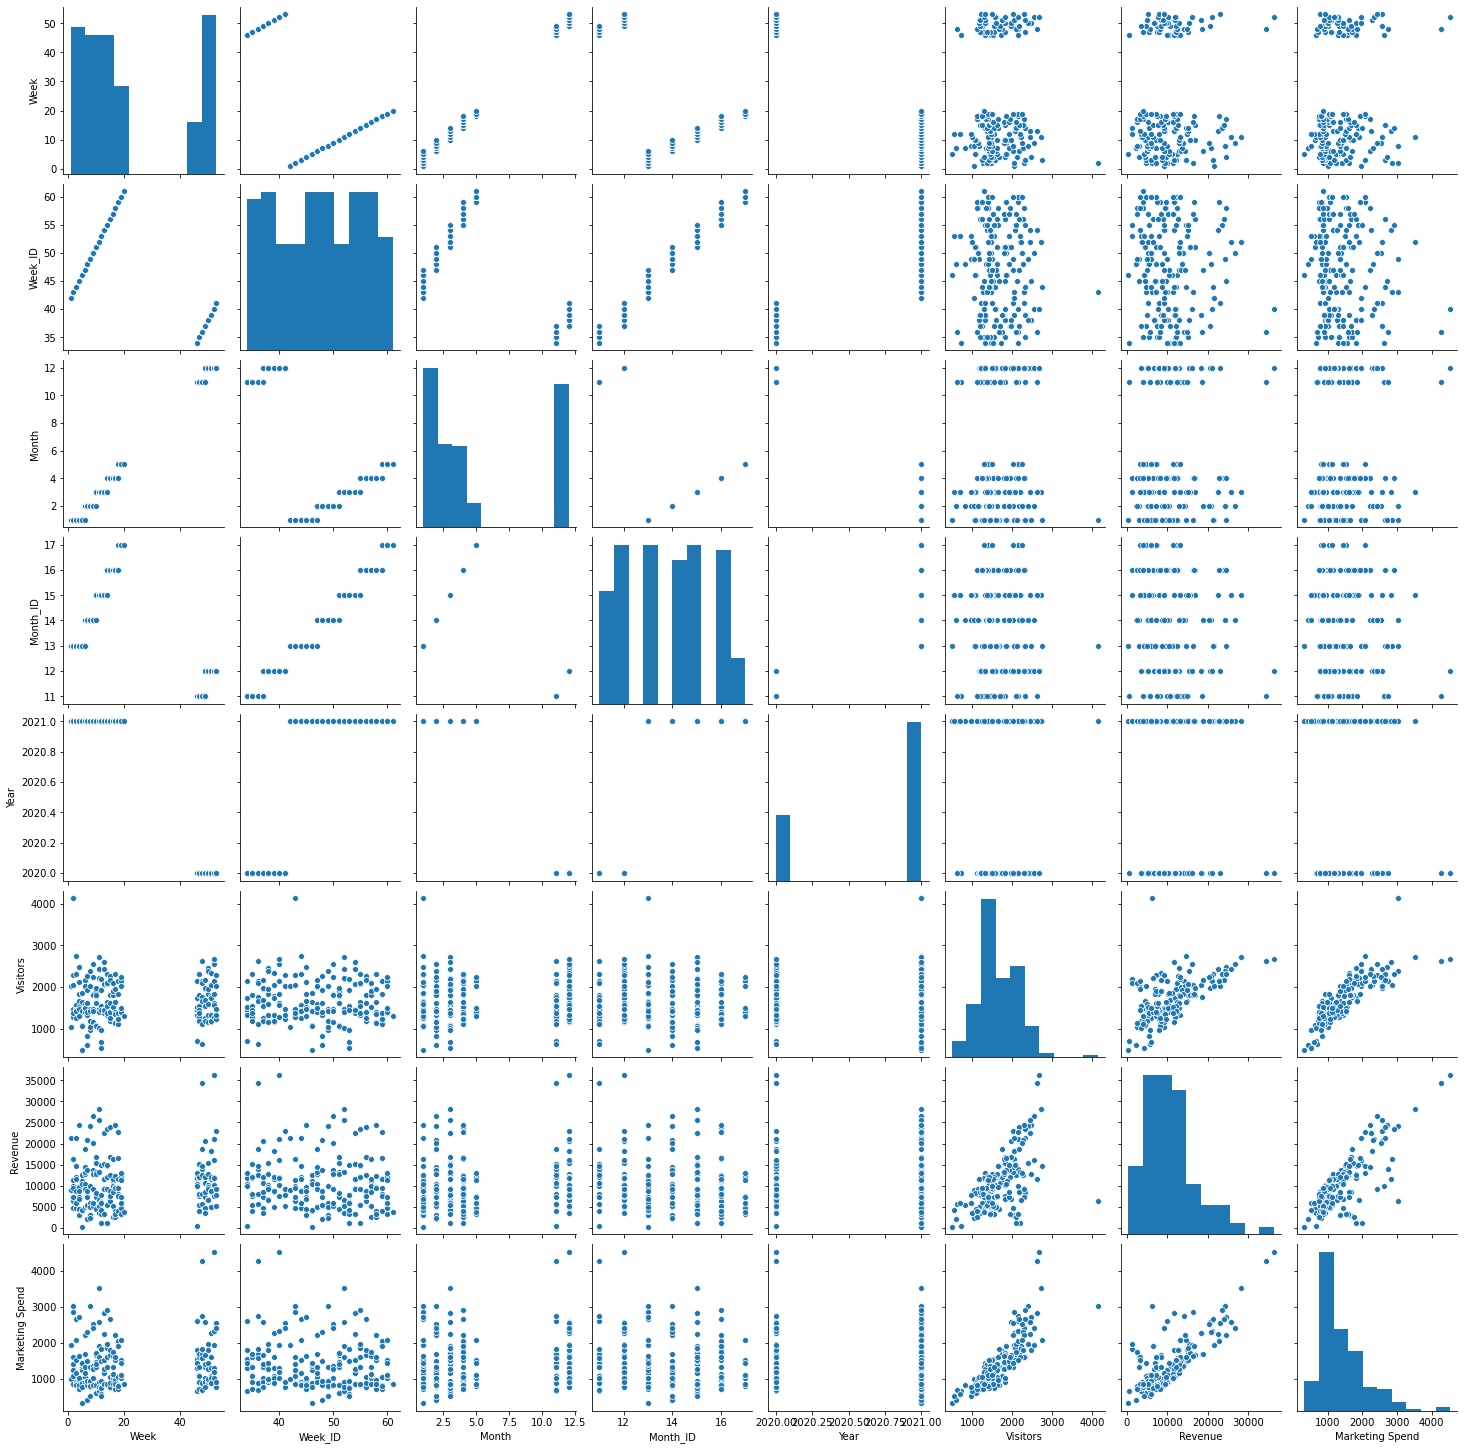

In [11]:
#plotting Pairplot for all the Numeric Feature VS Numeric Features to see The relationship between Them
pairplot=sns.pairplot(df)


In [12]:
df.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

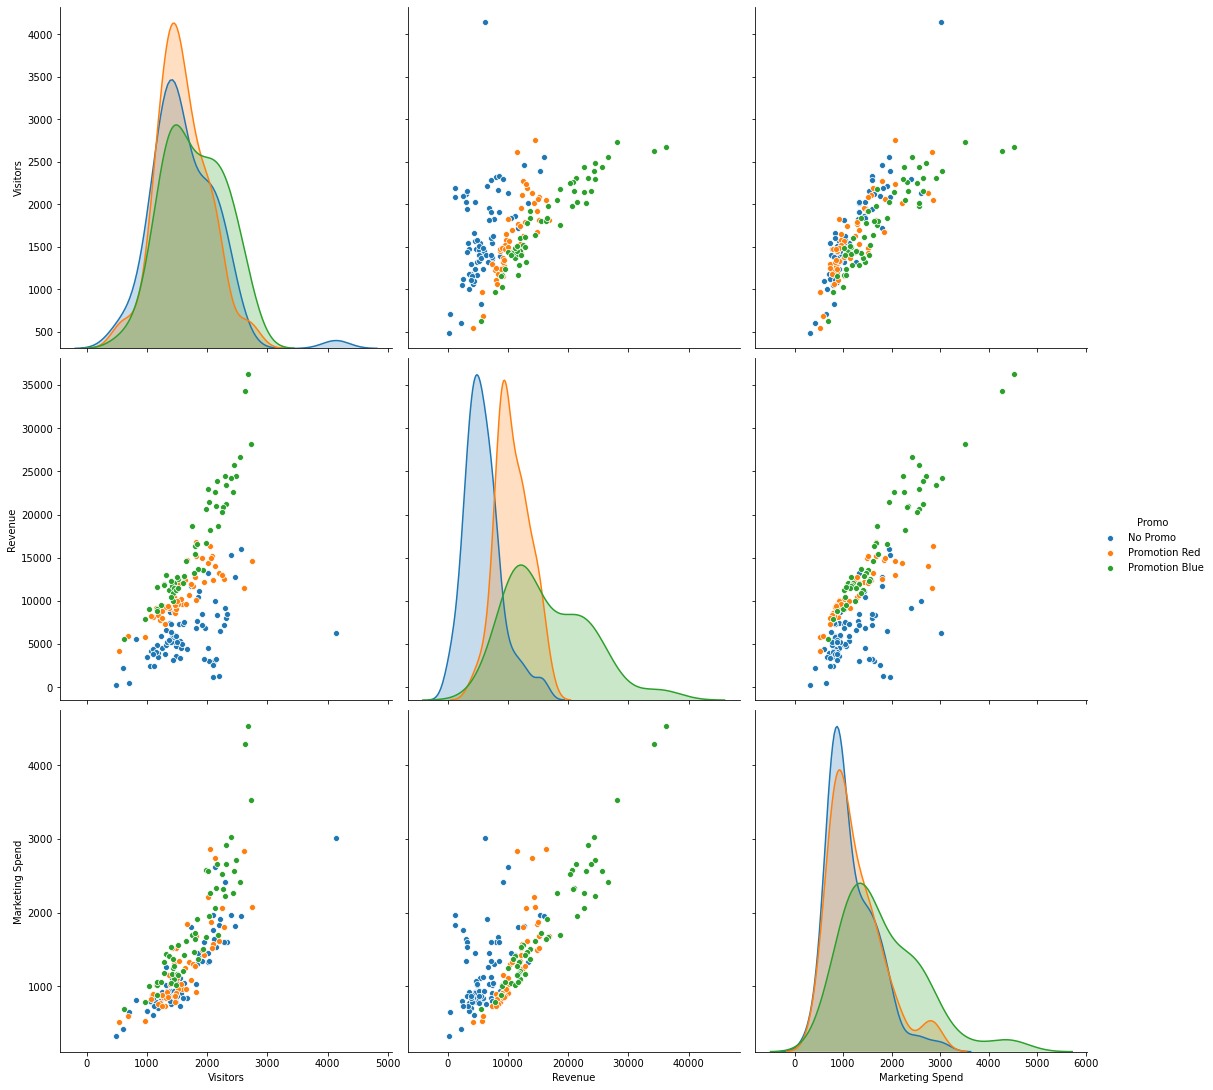

In [13]:
# 3 features are most important 'Visitors', 'Revenue', 'Marketing Spend' rest is for hue.
#Checking relationship w.r.t 'Promo'
pairplot2=sns.pairplot(df[['Visitors', 'Revenue', 'Marketing Spend','Promo']],hue='Promo',height=5)

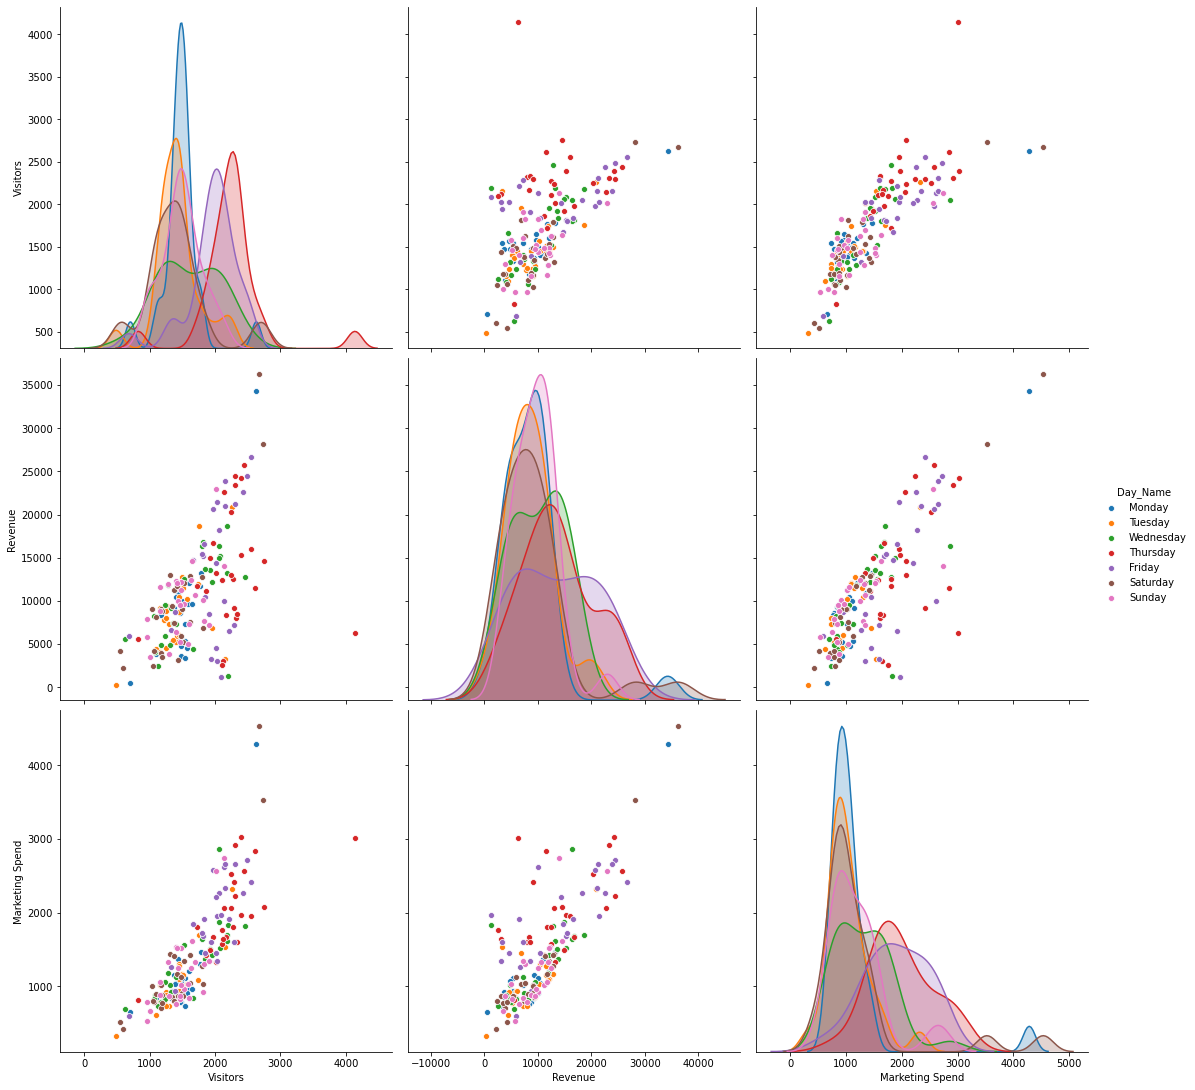

In [14]:
#Checking relationship w.r.t 'Day_Name'
pairplot3=sns.pairplot(df[['Visitors', 'Revenue', 'Marketing Spend','Day_Name']],hue='Day_Name',height=5)

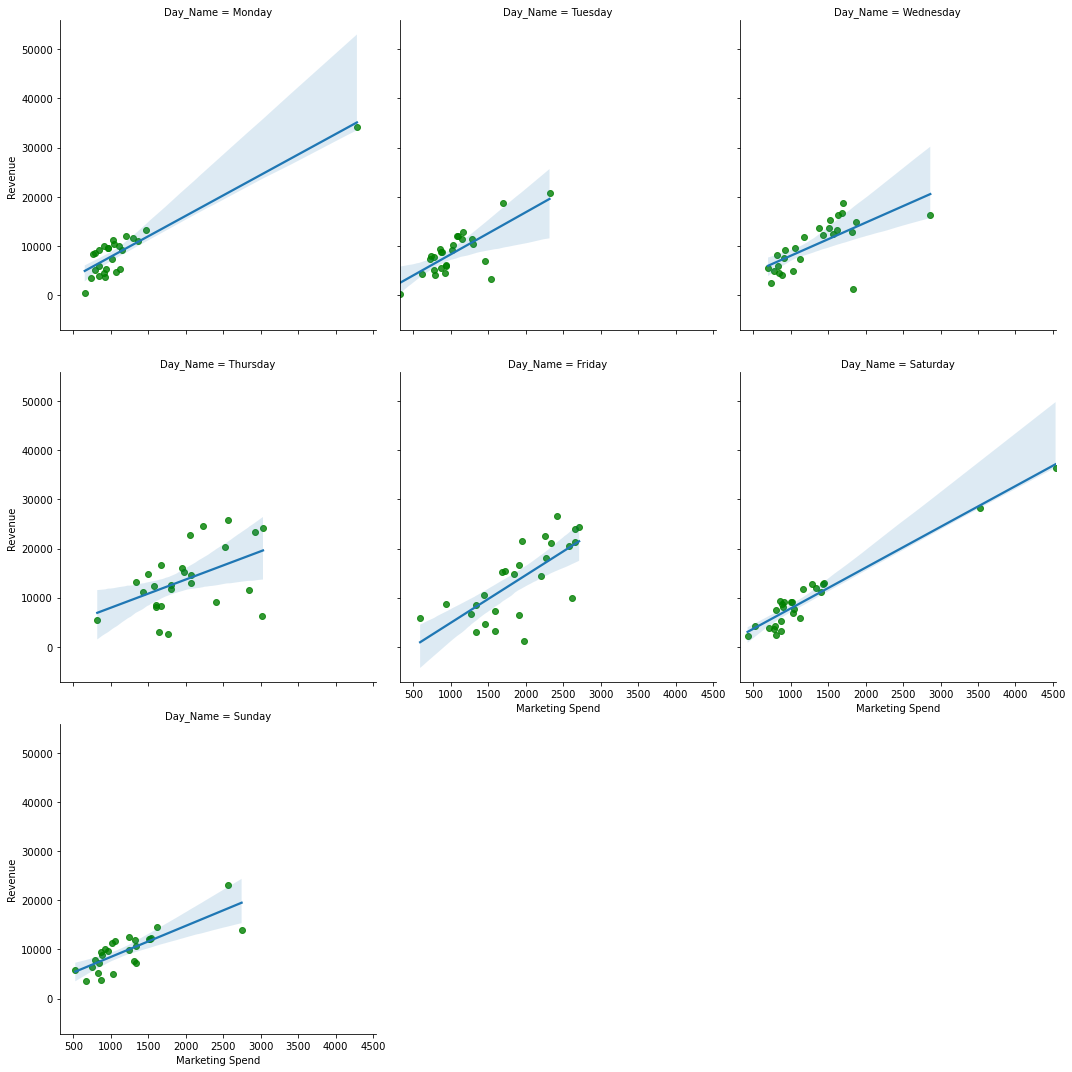

In [15]:
g = sns.lmplot(x='Marketing Spend', y='Revenue',col='Day_Name',
               data=df, col_wrap=3, height=5,scatter_kws={'color':'green'})

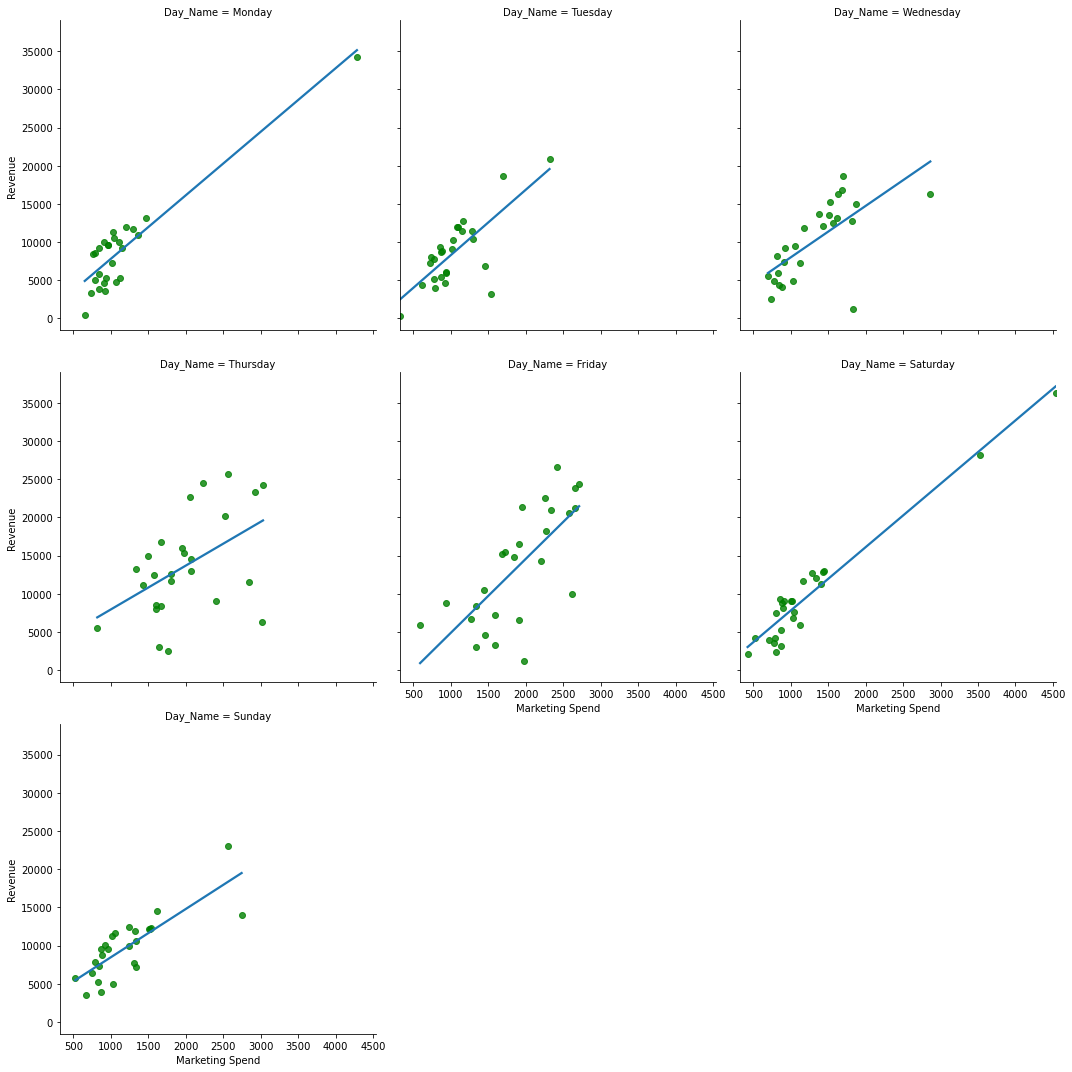

In [16]:
g = sns.lmplot(x='Marketing Spend', y='Revenue',col='Day_Name',
               data=df, col_wrap=3, height=5,scatter_kws={'color':'green'},ci=False)

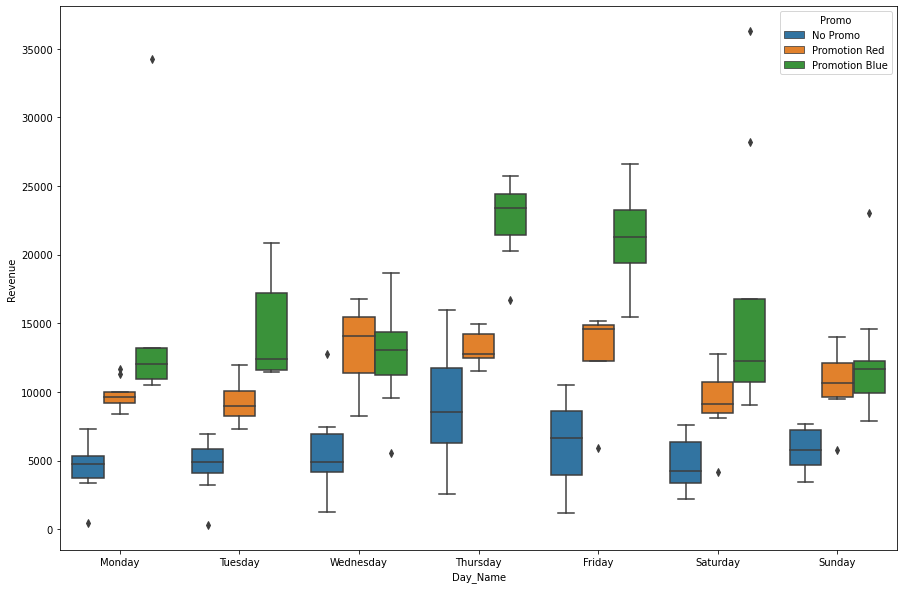

In [17]:
#Understanding distribution of Revenue by Categorical variable
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(15, 10)# Adjusting size of plot

g=sns.boxplot(x='Day_Name',y='Revenue',data=df,hue='Promo')

In [18]:
#Dealing with outlier
df[df['Revenue']>27000]

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
14,23/11/2020,48.0,36.0,11.0,11.0,2020.0,Monday,2632.0,34278.0,4284.750,Promotion Blue
47,26/12/2020,52.0,40.0,12.0,12.0,2020.0,Saturday,2678.0,36283.0,4535.375,Promotion Blue
124,13/03/2021,11.0,52.0,3.0,15.0,2021.0,Saturday,2732.0,28196.0,3524.500,Promotion Blue


In [19]:
#Removing the above outlier by rejecting datapoints or inverse selection
df=df[df['Revenue']<27000]
df.shape

(179, 11)

In [20]:
df.columns


Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

In [21]:
#selecting only important features for regression based on relationship graph
df[['Day_Name','Visitors', 'Revenue', 'Marketing Spend', 'Promo']]
       

,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,Monday,707.0,465.0,651.375000,No Promo
1,Tuesday,1455.0,10386.0,1298.250000,Promotion Red
2,Wednesday,1520.0,12475.0,1559.375000,Promotion Blue
3,Thursday,1726.0,11712.0,1801.750000,No Promo
4,Friday,2134.0,10000.0,2614.500000,No Promo
...,...,...,...,...,...
177,Wednesday,1400.0,7284.0,1119.600000,No Promo
178,Thursday,2244.0,13021.0,2067.888889,Promotion Red
179,Friday,2023.0,4587.0,1450.200000,No Promo
180,Saturday,1483.0,5927.0,1121.875000,No Promo


In [22]:
df=df[['Day_Name','Visitors', 'Revenue', 'Marketing Spend', 'Promo']]
df.head()

,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,Monday,707.0,465.0,651.375,No Promo
1,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,Thursday,1726.0,11712.0,1801.750,No Promo
4,Friday,2134.0,10000.0,2614.500,No Promo


In [23]:
#Just for Understanding 
#Making Categorical variable into Numerical Representation
#Handling Categorical Variable
#Splitting The Categorical feature
pd.get_dummies(df,columns=['Promo'],drop_first=False, dtype=None)

,Day_Name,Visitors,Revenue,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red
0,Monday,707.0,465.0,651.375000,1,0,0
1,Tuesday,1455.0,10386.0,1298.250000,0,0,1
2,Wednesday,1520.0,12475.0,1559.375000,0,1,0
3,Thursday,1726.0,11712.0,1801.750000,1,0,0
4,Friday,2134.0,10000.0,2614.500000,1,0,0
...,...,...,...,...,...,...,...
177,Wednesday,1400.0,7284.0,1119.600000,1,0,0
178,Thursday,2244.0,13021.0,2067.888889,0,0,1
179,Friday,2023.0,4587.0,1450.200000,1,0,0
180,Saturday,1483.0,5927.0,1121.875000,1,0,0


In [24]:
#Just for Understanding 
#Dropping first column after get_dummies
pd.get_dummies(df,columns=['Promo'],drop_first=True, dtype=None)

,Day_Name,Visitors,Revenue,Marketing Spend,Promo_Promotion Blue,Promo_Promotion Red
0,Monday,707.0,465.0,651.375000,0,0
1,Tuesday,1455.0,10386.0,1298.250000,0,1
2,Wednesday,1520.0,12475.0,1559.375000,1,0
3,Thursday,1726.0,11712.0,1801.750000,0,0
4,Friday,2134.0,10000.0,2614.500000,0,0
...,...,...,...,...,...,...
177,Wednesday,1400.0,7284.0,1119.600000,0,0
178,Thursday,2244.0,13021.0,2067.888889,0,1
179,Friday,2023.0,4587.0,1450.200000,0,0
180,Saturday,1483.0,5927.0,1121.875000,0,0


In [25]:
#Splitting The Categorical feature
pd.get_dummies(df,columns=['Promo','Day_Name'],drop_first=False, dtype=None)

,Visitors,Revenue,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,465.0,651.375000,1,0,0,0,1,0,0,0,0,0
1,1455.0,10386.0,1298.250000,0,0,1,0,0,0,0,0,1,0
2,1520.0,12475.0,1559.375000,0,1,0,0,0,0,0,0,0,1
3,1726.0,11712.0,1801.750000,1,0,0,0,0,0,0,1,0,0
4,2134.0,10000.0,2614.500000,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,1400.0,7284.0,1119.600000,1,0,0,0,0,0,0,0,0,1
178,2244.0,13021.0,2067.888889,0,0,1,0,0,0,0,1,0,0
179,2023.0,4587.0,1450.200000,1,0,0,1,0,0,0,0,0,0
180,1483.0,5927.0,1121.875000,1,0,0,0,0,1,0,0,0,0


In [26]:
#Splitting The Categorical feature
new_df=pd.get_dummies(df,columns=['Promo','Day_Name'],drop_first=False, dtype=None)
new_df.head()

,Visitors,Revenue,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,465.0,651.375,1,0,0,0,1,0,0,0,0,0
1,1455.0,10386.0,1298.250,0,0,1,0,0,0,0,0,1,0
2,1520.0,12475.0,1559.375,0,1,0,0,0,0,0,0,0,1
3,1726.0,11712.0,1801.750,1,0,0,0,0,0,0,1,0,0
4,2134.0,10000.0,2614.500,1,0,0,1,0,0,0,0,0,0


In [27]:
new_df.shape

(179, 13)

In [28]:
#Feature Selection
#Selecting only most important feature
#Two Methods  1)Correlation  2) Feature importance from any Tree best estimators

In [29]:
#by correlation method
#only for Numerical Feature
#Null values are automatically excluded
corr=new_df[['Visitors','Revenue','Marketing Spend']].corr()
corr

,Visitors,Revenue,Marketing Spend
Visitors,1.000000,0.531602,0.837313
Revenue,0.531602,1.000000,0.725675
Marketing Spend,0.837313,0.725675,1.000000


In [30]:
#.corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
#The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease
#0.8 +- is Strong Correlation, 0.6 to 0.8 +- is moderate Correlation & the other values, there is no correlation

(array([0.5, 1.5, 2.5]), <a list of 3 Text major ticklabel objects>)

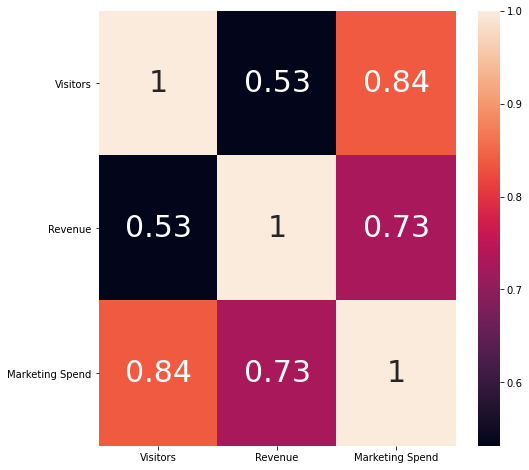

In [31]:
# Visualizing Correlation with a Heatmap
plt.figure(figsize=(8,8))
g = sns.heatmap(corr, annot = True,annot_kws={'size':30})
plt.yticks(rotation = 0)

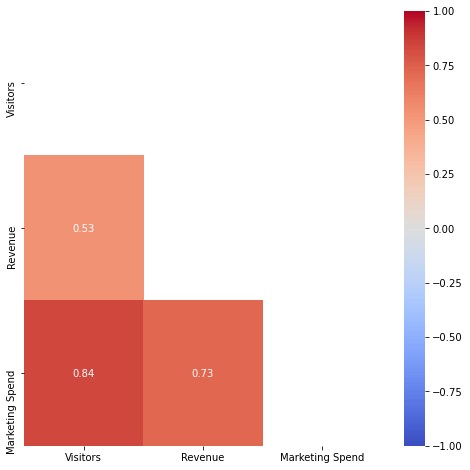

In [32]:
#Half Heatmap
plt.figure(figsize=(8,8))
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = True, mask = mask)

In [33]:
# Steps for Feature Importance
#Split the data into X & y
#Run a Tree-based estimators (i.e. decision trees & random forests)
#Run Feature Importance

In [34]:
X=new_df.drop('Revenue',axis=1)
Y=new_df['Revenue']
print(X.shape)
print(Y.shape)


(179, 12)
(179,)


In [35]:
X

,Visitors,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,651.375000,1,0,0,0,1,0,0,0,0,0
1,1455.0,1298.250000,0,0,1,0,0,0,0,0,1,0
2,1520.0,1559.375000,0,1,0,0,0,0,0,0,0,1
3,1726.0,1801.750000,1,0,0,0,0,0,0,1,0,0
4,2134.0,2614.500000,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
177,1400.0,1119.600000,1,0,0,0,0,0,0,0,0,1
178,2244.0,2067.888889,0,0,1,0,0,0,0,1,0,0
179,2023.0,1450.200000,1,0,0,1,0,0,0,0,0,0
180,1483.0,1121.875000,1,0,0,0,0,1,0,0,0,0


C:\Users\Lokanathswami\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [36]:
Y

0        465.0
1      10386.0
2      12475.0
3      11712.0
4      10000.0
        ...   
177     7284.0
178    13021.0
179     4587.0
180     5927.0
181     3861.0
Name: Revenue, Length: 179, dtype: float64

In [37]:
#From above X is Dataframe & Y is Array
#Need to Make X as Array
#Algorithm Need Values in the form of Array
X=X.values #Converting Dataframe into Array values
X

array([[7.070000e+02, 6.513750e+02, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.455000e+03, 1.298250e+03, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.520000e+03, 1.559375e+03, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       ...,
       [2.023000e+03, 1.450200e+03, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.483000e+03, 1.121875e+03, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.303000e+03, 8.710000e+02, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [38]:
#Initilizing Tree based estimator (Decision Tree & Random Forest)
#Decision Tree classifier for Feature Importance
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=10)
clf.fit(X,Y)
 

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [39]:
#Decision Tree Classifier Parameters
#DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
#                       max_features=None, max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0, presort=False,
#                       random_state=15, splitter='best')

In [40]:
# Running Feature Importance

for i, column in enumerate(new_df.drop('Revenue',axis=1)):
    print('The feature importance for {} is: {:.3f}'.format(column, clf.feature_importances_[i]))

The feature importance for Visitors is: 0.380
The feature importance for Marketing Spend is: 0.431
The feature importance for Promo_No Promo is: 0.019
The feature importance for Promo_Promotion Blue is: 0.037
The feature importance for Promo_Promotion Red is: 0.030
The feature importance for Day_Name_Friday is: 0.016
The feature importance for Day_Name_Monday is: 0.017
The feature importance for Day_Name_Saturday is: 0.018
The feature importance for Day_Name_Sunday is: 0.014
The feature importance for Day_Name_Thursday is: 0.007
The feature importance for Day_Name_Tuesday is: 0.018
The feature importance for Day_Name_Wednesday is: 0.013


In [41]:
#Splitting The Datsets train test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15)


In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((143, 12), (36, 12), (143,), (36,))

In [43]:
x_train

array([[2.12000000e+03, 1.64111111e+03, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.32200000e+03, 1.26750000e+03, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.36300000e+03, 8.66000000e+02, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [2.19000000e+03, 1.61381818e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.61100000e+03, 2.83762500e+03, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.31100000e+03, 2.92100000e+03, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [44]:
x_test

array([[1.82200000e+03, 9.15909091e+02, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.24500000e+03, 9.23000000e+02, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.55300000e+03, 2.41890909e+03, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.06800000e+03, 8.22300000e+02, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.31700000e+03, 1.02366667e+03, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00

In [45]:
 y_train

73      3021.0
32      6654.0
141     5478.0
154    10027.0
122    25704.0
        ...   
159     5274.0
131     4169.0
121    13201.0
136    11524.0
143    23368.0
Name: Revenue, Length: 143, dtype: float64

In [46]:
 y_test

27     10075.0
22      4587.0
109    26608.0
114     8223.0
37      4873.0
134    11494.0
118     3470.0
9       7441.0
130     5903.0
57      9418.0
166     9360.0
152     7596.0
49      5100.0
115    16727.0
119     3589.0
94      5519.0
135    15190.0
123     6523.0
60      7215.0
125     7878.0
127     6047.0
176     3215.0
31     15288.0
148     8828.0
70      8633.0
139    14587.0
174    12111.0
140     9262.0
180     5927.0
12      3926.0
26      3525.0
111     7222.0
181     3861.0
6      11929.0
153    11221.0
173     7445.0
Name: Revenue, dtype: float64

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

LinearRegression()

In [48]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [49]:
#Acceuracy by method 1
score=model.score(x_train,y_train)
print('The Training accuracy or score is:',score)

The Training accuracy or score is: 0.791949990505602


In [50]:
y_predicted_train=model.predict(x_train)
y_predicted_test=model.predict(x_test)


In [51]:
y_train

73      3021.0
32      6654.0
141     5478.0
154    10027.0
122    25704.0
        ...   
159     5274.0
131     4169.0
121    13201.0
136    11524.0
143    23368.0
Name: Revenue, Length: 143, dtype: float64

In [52]:
y_predicted_train

array([ 8705.50803238,  6472.17869274,  4440.32746821,  9854.13421815,
       20470.49081201, 13259.20147968, 13412.43936843, 19071.25323458,
        1011.80212161, 20962.47300197,  4753.61288693, 13648.41721974,
       13374.77268825, 20422.87899345,  8853.79300499,  8916.13289802,
       13498.94148289,  6205.52346237,  8286.46917634, 16700.31444964,
       19236.89110222,  2507.01947954,  9022.95702143, 20585.16837547,
       10157.53082079,  3629.09878399, 15744.20305379,  4665.32195611,
       15487.29412778,  9371.6680232 , 10657.85245056, 17391.63379279,
        7356.21819439,  3764.06039853,  4311.99089777, 13112.10851617,
        3605.07141122, 13380.08175878, 11521.68147579,  7416.01143452,
        7660.84372446, 10797.8869771 ,  8353.41108964, 15286.88903789,
       20134.1178417 ,  2802.64541887,  9446.08236768, 12611.79941142,
        9506.08359716, 14949.57797928, 12301.04535283,  4146.95924223,
       11605.50687406, 12673.508552  , 15904.41280179,  2849.35768349,
      

In [53]:
y_train.shape,y_predicted_train.shape

((143,), (143,))

In [54]:
#Accuracy score by method 2 
from sklearn.metrics import r2_score
r2_score(y_train, y_predicted_train)

0.791949990505602

In [55]:
#Acceuracy for testing dataset
score=model.score(x_test,y_test)
print('The Testing accuracy or score is:',score)

The Testing accuracy or score is: 0.7511903865386681


In [56]:
from sklearn.metrics import mean_squared_error
mean_squared_error_train=mean_squared_error(y_train, y_predicted_train)
mean_squared_error_train

6856863.191027325

In [57]:
mean_squared_error_test=mean_squared_error(y_test, y_predicted_test)
mean_squared_error_test

5477566.185266753

In [58]:
#Taking SuareRoot of mean_squared_error
from math import sqrt
sqrt(mean_squared_error_train)
print('The RMSE on Training Dataset is',sqrt(mean_squared_error_train))
print('The RMSE on Testing Dataset is',sqrt(mean_squared_error_test))


The RMSE on Training Dataset is 2618.561282656437
The RMSE on Testing Dataset is 2340.4200873490113


In [59]:

from sklearn.metrics import mean_absolute_error
print('The MAE on Training Dataset is',mean_absolute_error(y_train, y_predicted_train))
print('The MAE on Testing Dataset is',mean_absolute_error(y_test, y_predicted_test))


The MAE on Training Dataset is 1928.0670665528864
The MAE on Testing Dataset is 1692.38355771623


In [60]:
print('Coefficients :',model.coef_)

Coefficients : [ 9.72168996e-01  3.69561477e+00 -4.29587654e+03  3.72469059e+03
  5.71185949e+02  7.38005738e+02 -3.52308895e+02 -9.02241594e+02
 -1.55867567e+02  8.14821481e+02  1.50084913e+02 -2.92494076e+02]


In [61]:
print('Intercept :',model.intercept_)

Intercept : 4060.650366499687


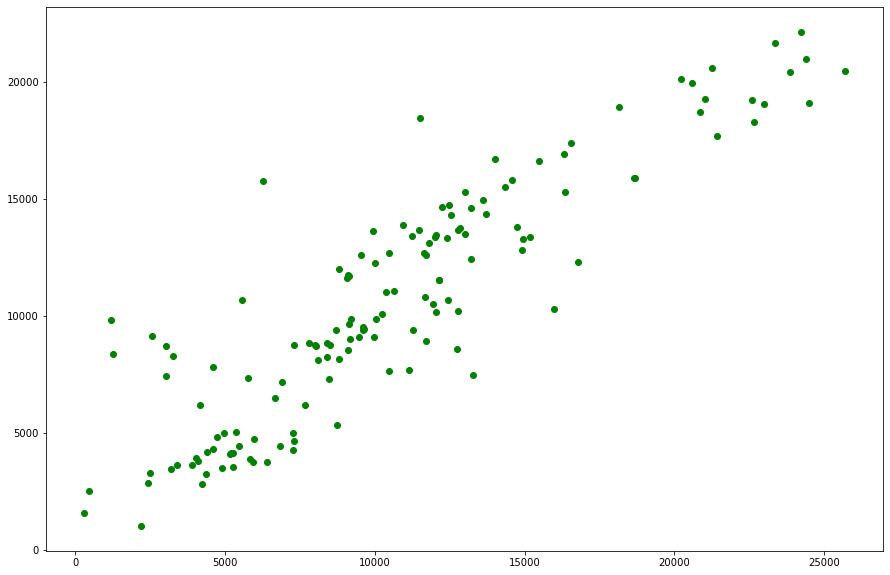

In [62]:
#Plotting Actual VS Predicted 
plt.figure(figsize=(15,10))
plt.scatter(y_train,y_predicted_train,c='green')

Text(0.5, 1.0, 'Actuals Vs Predicted Values')

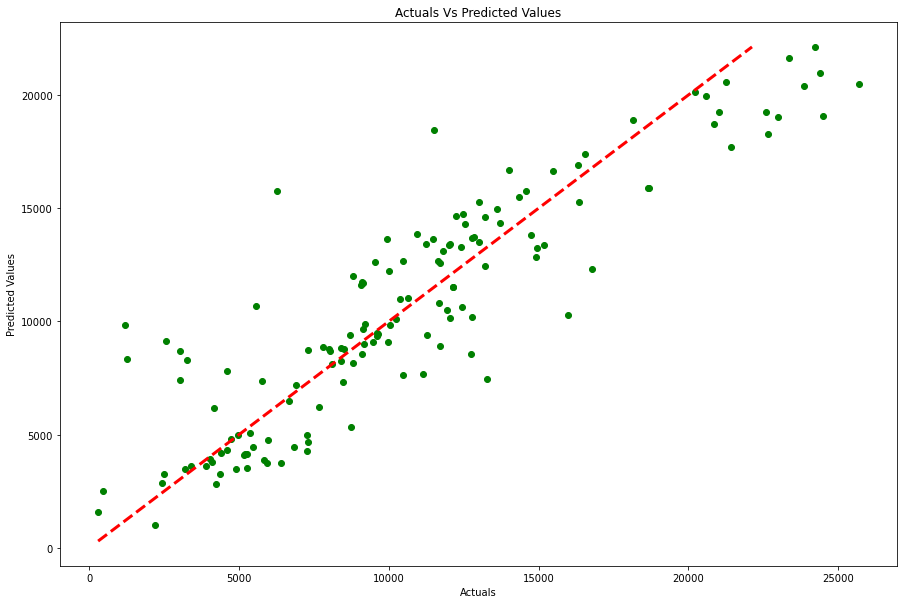

In [63]:
#Fitting Line
plt.figure(figsize=(15,10))
plt.scatter(y_train,y_predicted_train,c='green')
plt.plot([y_train.min(),y_predicted_train.max()],[y_train.min(),y_predicted_train.max()],'k--',c='red',lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')

Text(0.5, 1.0, 'Actuals Vs Residuals')

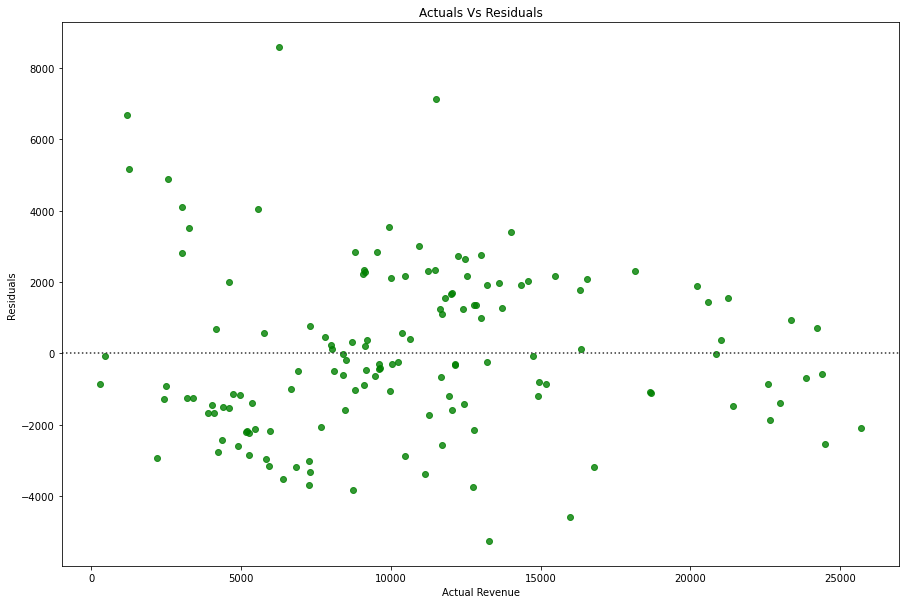

In [64]:
# Ploting Residuals
#Residuals are diffrence between Y actual and Y Predicted

plt.figure(figsize=(15,10))

sns.residplot(y_train, y_predicted_train, color='green')
plt.xlabel('Actual Revenue')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')

In [65]:
coeff=model.coef_
coeff

array([ 9.72168996e-01,  3.69561477e+00, -4.29587654e+03,  3.72469059e+03,
        5.71185949e+02,  7.38005738e+02, -3.52308895e+02, -9.02241594e+02,
       -1.55867567e+02,  8.14821481e+02,  1.50084913e+02, -2.92494076e+02])

In [66]:
coeff=coeff.reshape(-1,12) #(adjust row,12 column)
coeff

array([[ 9.72168996e-01,  3.69561477e+00, -4.29587654e+03,
         3.72469059e+03,  5.71185949e+02,  7.38005738e+02,
        -3.52308895e+02, -9.02241594e+02, -1.55867567e+02,
         8.14821481e+02,  1.50084913e+02, -2.92494076e+02]])

In [84]:
X2=new_df.drop('Revenue',axis=1).columns

Coeff_df=pd.DataFrame(coeff, columns=[X2])
Coeff_df

,Visitors,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,0.972169,3.695615,-4295.87654,3724.69059,571.185949,738.005738,-352.308895,-902.241594,-155.867567,814.821481,150.084913,-292.494076


In [85]:
Coeff_df[['Visitors']].values[0]

array([0.972169])

In [86]:
# Making Predictions                        

# Variables

Day = 'Day_Name_Friday'
Visitors = 8000
Marketing_Spend = 5000
Promo = 'Promo_Promotion Red'

# Regression Formula for pred
# y = a + bx + ..   # Where y = price, a = intercept,  b = no. of Visitors and x = coefficient of engine size

# Prediction Calculator
pred1 = (model.intercept_) + (Coeff_df[[Day]].values[0] * 1) + (Coeff_df[['Visitors']].values[0] * Visitors) + (Coeff_df[['Marketing Spend']].values[0] * Marketing_Spend) + (Coeff_df[[Promo]].values[0] * 1)

print('The predicted Revenue is: ', pred1)

The predicted Revenue is:  [31625.26784989]
